In [71]:
using LinearAlgebra, Polynomials, BellBruno, MultivariatePolynomials, Plots

In [18]:
bp=bell_poly(5)

6-element Vector{Vector{Any}}:
 []
 [Int8[1]]
 [Int8[0, 1], Int8[2, 0]]
 [Int8[0, 0, 1], Int8[1, 1, 0], Int8[3, 0, 0]]
 [Int8[0, 0, 0, 1], Int8[1 0; 0 2; 1 0; 0 0], Int8[2, 1, 0, 0], Int8[4, 0, 0, 0]]
 [Int8[0, 0, 0, 0, 1], Int8[1 0; 0 1; … ; 1 0; 0 0], Int8[2 1; 0 2; … ; 0 0; 0 0], Int8[3, 1, 0, 0, 0], Int8[5, 0, 0, 0, 0]]

In [21]:
bell_coeff(bp)
Polynomial(bell_coeff(bp)[4])

Polynomial(1 + 3*x + x^2)

In [123]:
b0(x)=1
b1(x)=x
b2(x1,x2)=x2+x1^2
b3(x1,x2,x3)=x3+3*x1*x2+x1^3
b4(x1,x2,x3,x4)=x4+3*x2^2+4*x1*x3+6*x1^2*x2+x1^4
b5(x1,x2,x3,x4,x5)=x5+10*x2*x3+5*x1*x4+15*x1*x2^2+10*x1^2*x3+10x1^3*x2+x1^5

b5 (generic function with 1 method)

In [149]:
g(n)=n^0.8
n=5
#generate sequence a_k
a= g(n)^2 /2/pi * [(-1)^(k+1)/k for k=1:n]

w=[1.0,2.0,3.0,4.0,5.0]
w[1]=b1(a[1])
w[2]=b2(a[1],a[2])
w[3]=b3(a[1],a[2],a[3])
w[4]=b4(a[1],a[2],a[3],a[4])
w[5]=b5(a[1],a[2],a[3],a[4],a[5])
w=[w[i]/(factorial(i))*(g(n)/2/pi)^i for i in 1:5]
#w=sqrt.(w)
w=[1;w]

6-element Vector{Float64}:
  1.0
  1.20550293947557
  0.552796798678358
  0.10471614585941211
  0.0012482439216269466
 -0.0016916782036220863

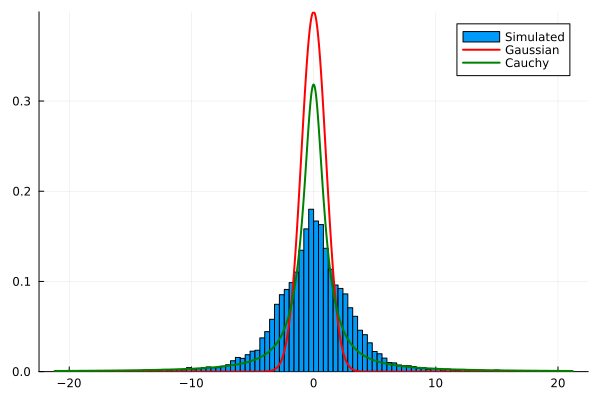

In [150]:
w=sqrt.(abs.(w))
function NormalRootSim(nTrials)
    ReRoots = vcat([ReFromCVec(roots(Polynomial(w .* randn(6)))) for i in 1:nTrials]...)
    return ReRoots
end
function ReFromCVec(CVec)
    IsRealEWise=[isreal(el) for el in CVec]
    return real(CVec[IsRealEWise])
end
nTrials=10000
p(x)=1/sqrt(2*pi)*exp(-x^2/2)
q(x)=1/(1+x^2)/pi
histogram(NormalRootSim(nTrials),bins=range(-20, 20, length=101),label="Simulated",normalize=:pdf)
plot!(p, label="Gaussian", lw=2, color=:red)
plot!(q, label="Cauchy", lw=2, color=:green)